Este código realiza varias operaciones de procesamiento y análisis sobre un conjunto de datos de imágenes faciales, utilizando la biblioteca de aprendizaje automático scikit-learn, así como numpy para operaciones matemáticas y matplotlib para la visualización.

El código aplica la Descomposición en Valores Singulares (SVD) a un conjunto de imágenes de caras para reducir dimensionalidad y analizar componentes principales. Se visualizan las imágenes originales y los componentes principales, se reconstruyen las imágenes a partir de SVD, y se mide el error de reconstrucción. Además, se analiza la distribución de los valores singulares y se proyectan las imágenes en un espacio de menor dimensión para explorar la estructura subyacente del conjunto de datos.

In [32]:
# Importar las bibliotecas necesarias
from sklearn import datasets  # Para cargar conjuntos de datos predefinidos
import matplotlib.pyplot as plt  # Para visualización de imágenes y gráficos
import numpy as np  # Para operaciones numéricas y algebra lineal

Forma del conjunto de datos de imágenes: (400, 64, 64)


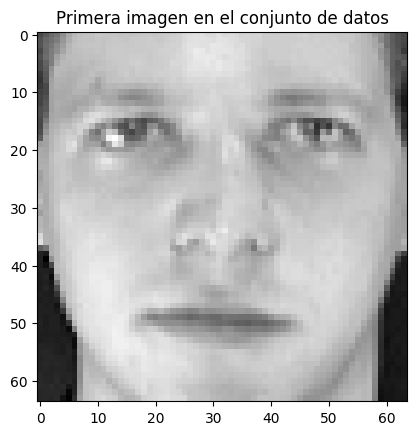

In [33]:
# Cargar el conjunto de datos de imágenes de caras Olivetti
olivetti_faces = datasets.fetch_olivetti_faces()
imagenes = olivetti_faces.images  # Obtener las imágenes

# Imprimir la forma del conjunto de datos de imágenes (número de imágenes, altura, ancho)
print("Forma del conjunto de datos de imágenes:", imagenes.shape)

# Visualizar la primera imagen en escala de grises
plt.imshow(imagenes[0], cmap='gray')
plt.title("Primera imagen en el conjunto de datos")
plt.show()

In [34]:
# Aplanar las imágenes de 64x64 píxeles a un vector de 4096 elementos (una fila por imagen)
imagenes_aplanadas = imagenes.reshape(imagenes.shape[0], -1)
print("Forma después de aplanar las imágenes:", imagenes_aplanadas.shape)

# Realizar la Descomposición en Valores Singulares (SVD) de la matriz de imágenes aplanadas
U, valores_singulares, Vh = np.linalg.svd(imagenes_aplanadas)
print("Formas de U, valores_singulares, Vh:", U.shape, valores_singulares.shape, Vh.shape)

# Reconstruir las imágenes a partir de las matrices SVD
imagenes_reconstruidas = U.dot(np.diag(valores_singulares).dot(Vh[:valores_singulares.shape[0]]))
print("Forma de las imágenes reconstruidas:", imagenes_reconstruidas.shape)

# Calcular el error de reconstrucción usando la norma de Frobenius
error_reconstruccion = np.linalg.norm(imagenes_aplanadas - imagenes_reconstruidas, ord='fro')
print("Error de reconstrucción (norma de Frobenius):", error_reconstruccion)

Forma después de aplanar las imágenes: (400, 4096)
Formas de U, valores_singulares, Vh: (400, 400) (400,) (4096, 4096)
Forma de las imágenes reconstruidas: (400, 4096)
Error de reconstrucción (norma de Frobenius): 0.00026315142


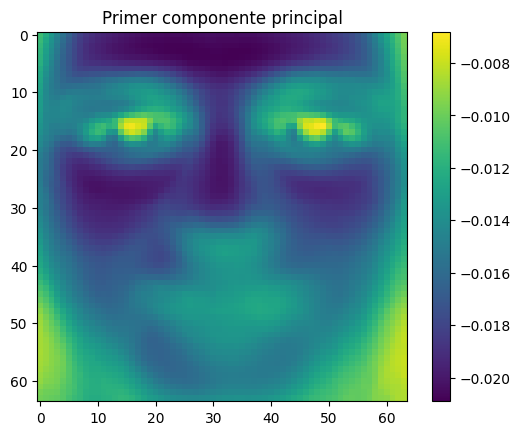

In [35]:
# Visualizar el primer componente principal de las imágenes
plt.imshow(Vh[0].reshape(64, 64))
plt.colorbar()
plt.title("Primer componente principal")
plt.show()

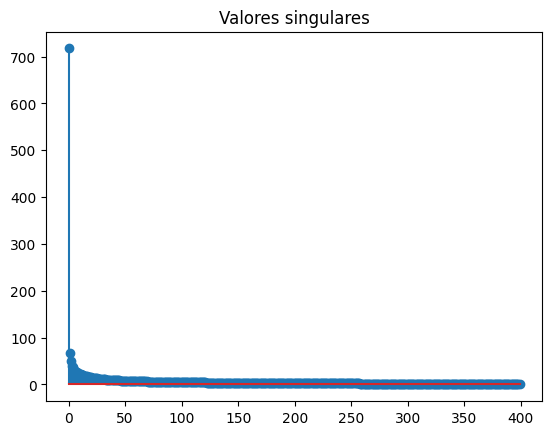

In [36]:
# Graficar los valores singulares (valores_singulares)
plt.stem(valores_singulares)
plt.title("Valores singulares")
plt.show()


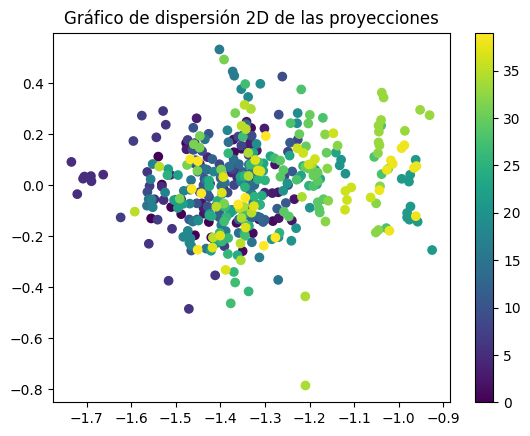

In [37]:
# Calcular una matriz de proyección usando U y la raíz cuadrada de los valores singulares
matriz_proyeccion = U.dot(np.diag(valores_singulares**0.5))

# Visualizar un gráfico de dispersión de las proyecciones en las primeras dos dimensiones
plt.scatter(matriz_proyeccion[:, 0], matriz_proyeccion[:, 30], c=olivetti_faces.target)
plt.colorbar()
plt.title("Gráfico de dispersión 2D de las proyecciones")
plt.show()

In [38]:
# Extraer las primeras filas de Vh que corresponden a las dimensiones de los valores singulares
Vh_truncado = Vh[:valores_singulares.shape[0]]

# Calcular una matriz de covarianza aproximada usando los valores singulares y Vh_truncado
matriz_covarianza_aproximada = Vh_truncado.T.dot(np.diag(valores_singulares**2)).dot(Vh_truncado)
print("Forma de la matriz de covarianza aproximada:", matriz_covarianza_aproximada.shape)

Forma de la matriz de covarianza aproximada: (4096, 4096)
